In [1]:
import pydmd
import dmd_func
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting, datasets

/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
r1=pd.read_csv('./connectivity_matrix/REST1/ses-01/raw_timeseries.txt').T.values
r2=pd.read_csv('./connectivity_matrix/REST1/ses-02/raw_timeseries.txt').T.values
r3=pd.read_csv('./connectivity_matrix/REST2/ses-01/raw_timeseries.txt').T.values
r4=pd.read_csv('./connectivity_matrix/REST2/ses-02/raw_timeseries.txt').T.values

In [3]:
def fit_dmd(timeseries):
    num_modes=8
    dmd1 = pydmd.DMD(svd_rank=num_modes, sorted_eigs='abs')
    dmd1.fit(timeseries)
    dmd1.plot_eigs(show_axes=True, show_unit_circle=True)

Eigenvalue (0.42286726641469186+0j): distance from unit circle 0.5771327335853081
Eigenvalue (0.813831784788745+0j): distance from unit circle 0.18616821521125504
Eigenvalue (0.9294631367828192+0.007013924004790343j): distance from unit circle 0.07051039932223957
Eigenvalue (0.9294631367828192-0.007013924004790343j): distance from unit circle 0.07051039932223957
Eigenvalue (0.9999975584973343+0j): distance from unit circle 2.4415026657065297e-06
Eigenvalue (0.9946835323000245+0j): distance from unit circle 0.005316467699975513
Eigenvalue (0.9632447993682905+0j): distance from unit circle 0.03675520063170945
Eigenvalue (0.9809329763890796+0j): distance from unit circle 0.019067023610920386


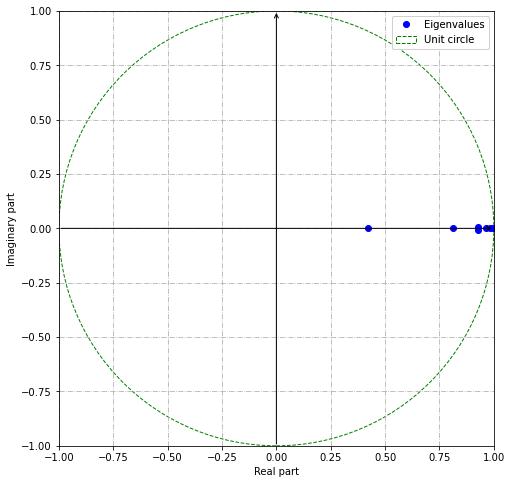

In [6]:
dmd1=pydmd.DMD(svd_rank=8)
dmd1.fit(r1)
for eig in dmd1.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(np.sqrt(eig.imag**2+eig.real**2) - 1)))
dmd1.plot_eigs(show_axes=True, show_unit_circle=True)

In [7]:
for dynamic in dmd1.dynamics:
    print('MIN', min(dynamic.real), 'MAX', max(dynamic.real))

MIN -13.433008641579354 MAX 0.0
MIN 1.6456072252052379e-105 MAX 305.691802582769
MIN -88.59065966089615 MAX 3.6245163098869044e-11
MIN -88.59065966096814 MAX 3.624516309897115e-11
MIN 162435.16634884433 MAX 162911.3700844739
MIN -2046.1669360319252 MAX -3.4290172340365657
MIN -671.1814161836785 MAX -2.12378590061535e-17
MIN 6.89821289519574e-08 MAX 729.7504740272445


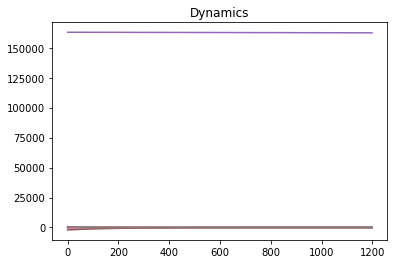

In [8]:
for dynamic in dmd1.dynamics:
    plt.plot(dmd1.dmd_timesteps, dynamic.real)
    plt.title('Dynamics')
plt.show()

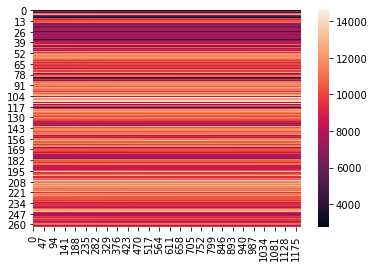

In [9]:
sns.heatmap(dmd1.reconstructed_data.real)
plt.show()

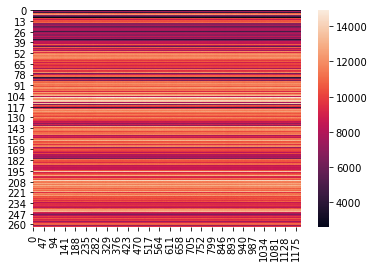

In [10]:
sns.heatmap(dmd1.snapshots)
plt.show()

In [11]:
mse = (np.square(dmd1.snapshots - dmd1.reconstructed_data.real)).mean(axis=None)
mse

5319.910906464326

In [12]:
power = datasets.fetch_coords_power_2011()
power_coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

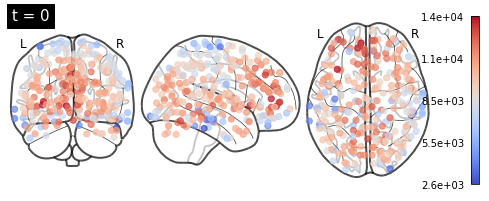

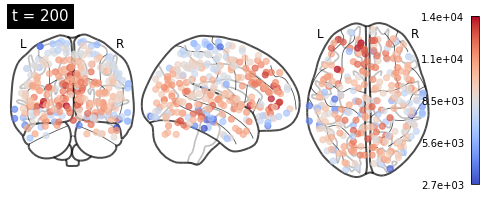

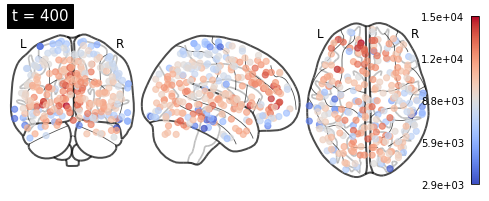

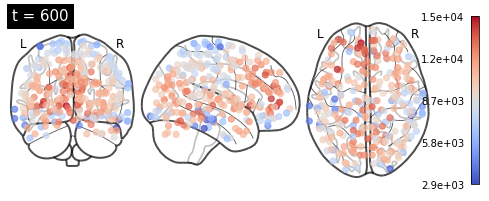

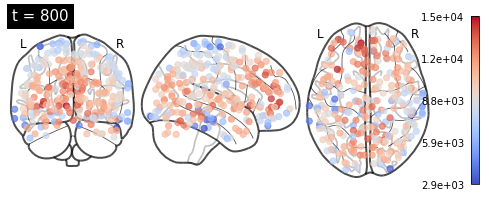

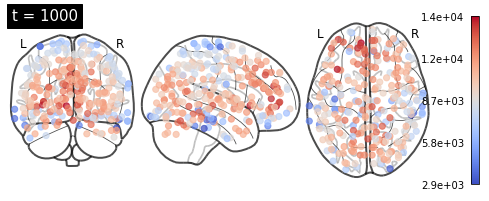

In [13]:
#plotting.plot_markers(node_values=dmd.snapshots[:,0], node_coords=power_coords)
for i in range(0,1200, 200):
    plotting.plot_markers(node_values=dmd1.snapshots[:,i], node_coords=power_coords, title='t = '+str(i), node_cmap='coolwarm', node_threshold=.05)
    plt.pause(0.05)

In [46]:
dmd1.amplitudes.real

array([-1.34330086e+01,  3.05691803e+02, -8.85906597e+01, -8.85906597e+01,
        1.62911370e+05, -2.04616694e+03, -6.71181416e+02,  7.29750474e+02])

/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/che

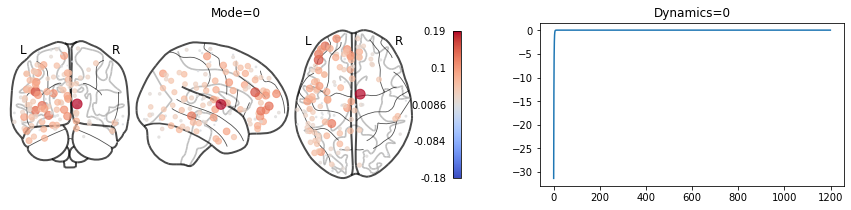

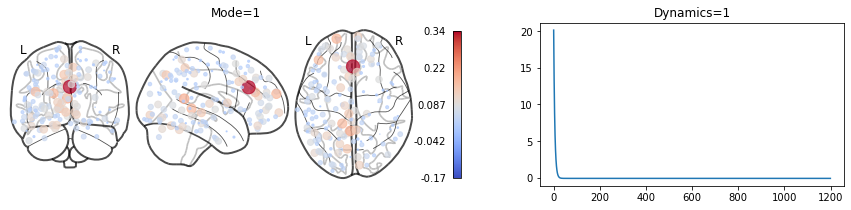

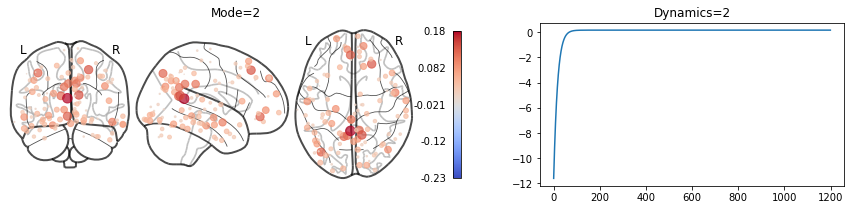

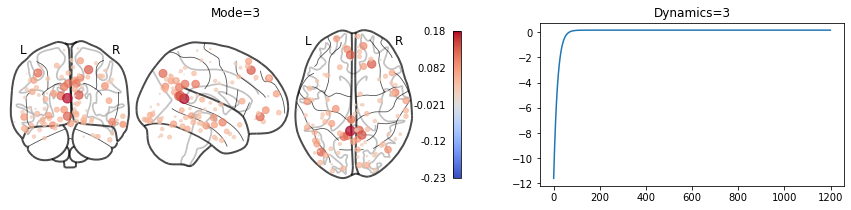

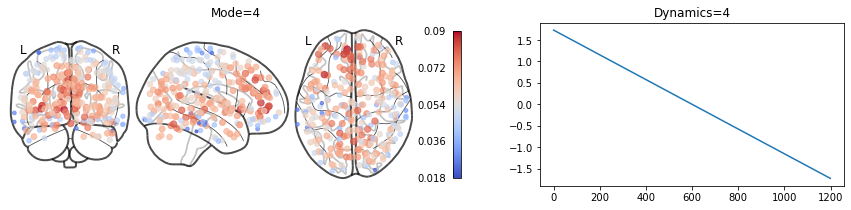

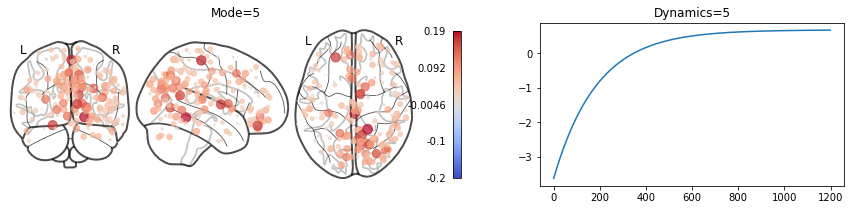

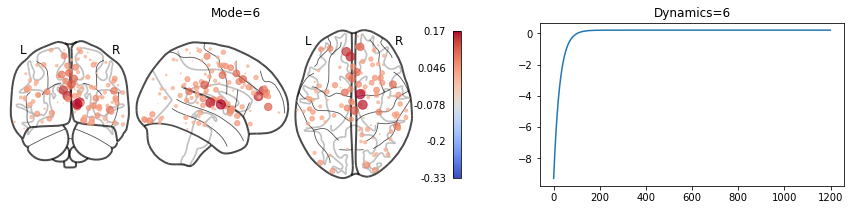

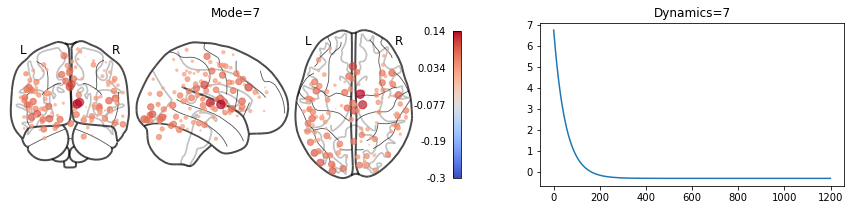

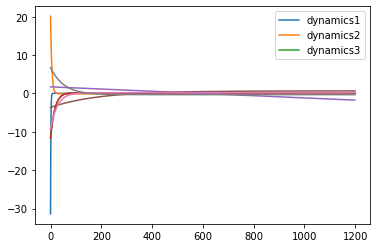

In [51]:
def plot_mode_dynamics(dmd, num_modes, power_coords):
    for i in range(num_modes):
        fig, axes = plt.subplots(1,2,figsize=(15,3), gridspec_kw={'width_ratios': [3,2]})
        plotting.plot_markers(node_values=dmd.modes.real[:,i], node_coords=power_coords, node_cmap='coolwarm', node_size=dmd.modes.real[:,i]*500,axes=axes[0])
        sns.lineplot(x=dmd.dmd_timesteps, y=stats.zscore(dmd.dynamics.real, axis=1)[i,:], ax=axes[1])
        #axes[1].axhline(y=dmd.amplitudes.real[i], color='r', linestyle='-')
        axes[0].set_title('Mode='+str(i))
        axes[1].set_title('Dynamics='+str(i))
    plt.show()
    
    for i in range(num_modes):
        sns.lineplot(x=dmd.dmd_timesteps, y=stats.zscore(dmd.dynamics.real, axis=1)[i,:])
        plt.legend(['dynamics1', 'dynamics2', 'dynamics3'])
    plt.show()
    
plot_mode_dynamics(dmd1, 8, power_coords)

In [49]:
num_modes=5
dmd2 = pydmd.DMD(svd_rank=num_modes, sorted_eigs='abs')
dmd2.fit(r2)

/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


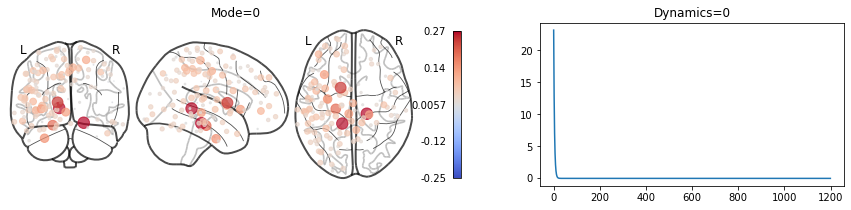

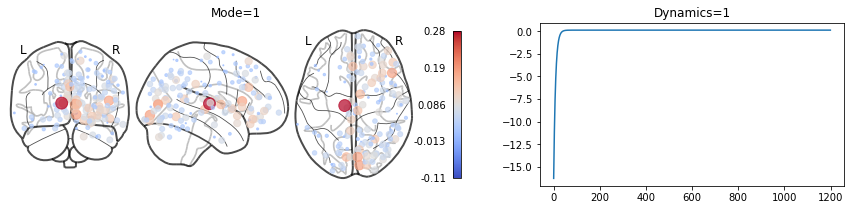

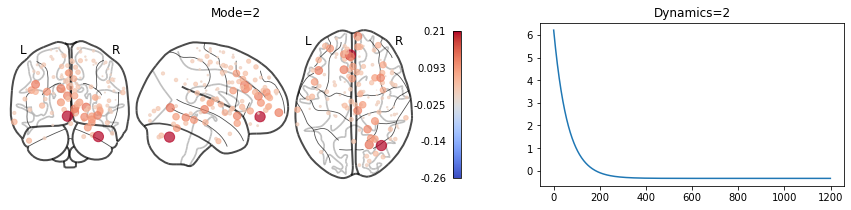

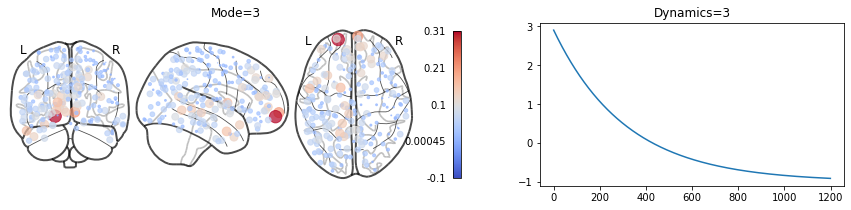

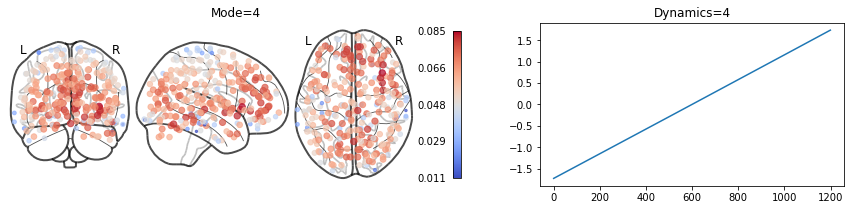

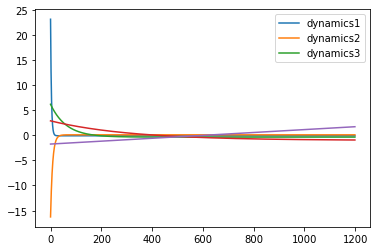

In [31]:
plot_mode_dynamics(dmd2, 5, power_coords)

In [32]:
num_modes=5
dmd3 = pydmd.DMD(svd_rank=num_modes, sorted_eigs='abs')
dmd3.fit(r3)

/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/che

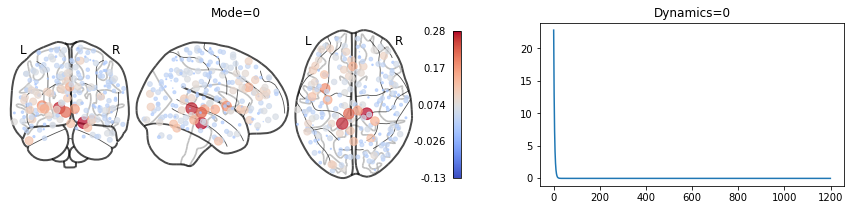

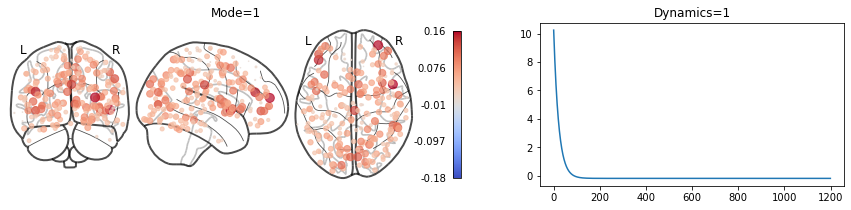

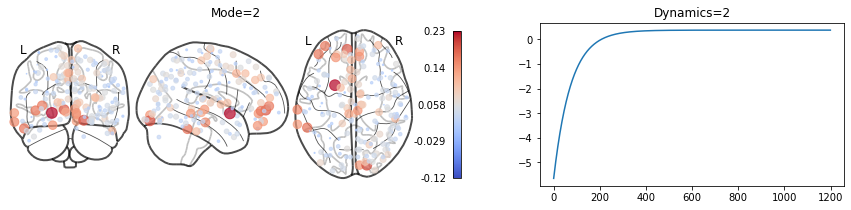

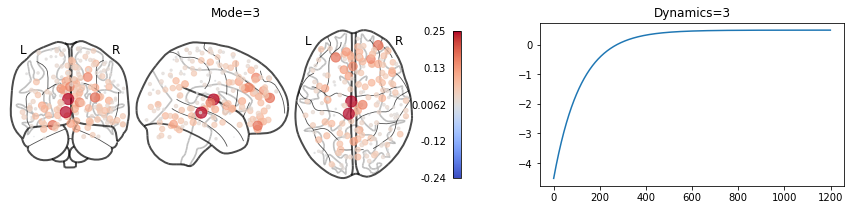

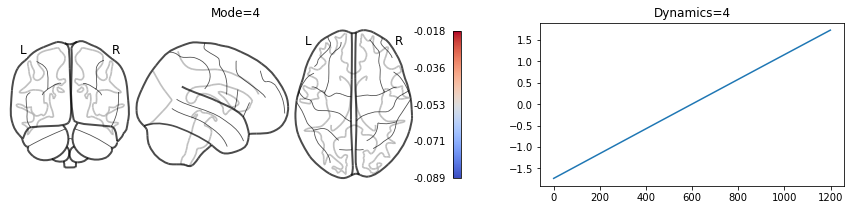

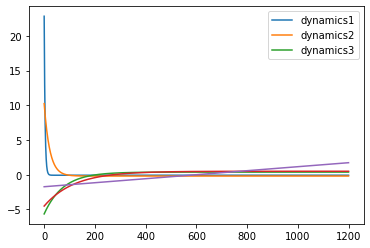

In [33]:
plot_mode_dynamics(dmd3, 5, power_coords)

In [36]:
mydmd1 = dmd_func.DMD(n_modes=5)
mydmd1.fit(r1)

In [37]:
mydmd1.phi_.real

array([[ -3.60533797,  -2.20382489,  -2.20382489,  15.68358727,
        -13.32994127],
       [ -1.54467029,  -3.22466259,  -3.22466259,   3.85203259,
         -5.34629272],
       [  5.27783233,  -3.93841613,  -3.93841613,  -9.28118095,
          7.57620341],
       ...,
       [ -0.07943134,  -1.91143494,  -1.91143494,   1.80685841,
         -4.88144181],
       [  2.73467408,  -1.1001607 ,  -1.1001607 ,  -5.64436405,
         -1.14295672],
       [  1.9936555 ,  -3.228757  ,  -3.228757  ,   0.51755458,
         -7.19685774]])

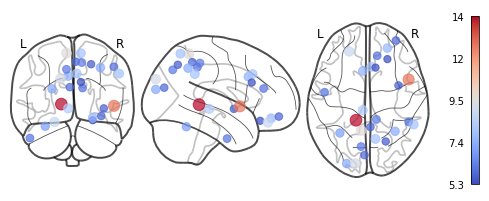

In [38]:
plotting.plot_markers(node_values=mydmd1.phi_.real[:,0], node_coords=power_coords, node_cmap='coolwarm', node_size=mydmd1.phi_.real[:,0]*10, node_threshold=5)

/Users/cheryang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


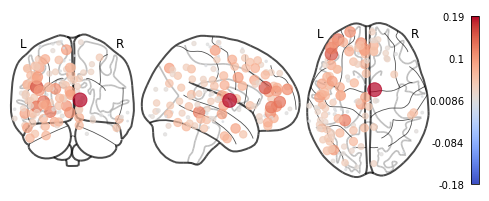

In [39]:
plotting.plot_markers(node_values=dmd1.modes.real[:,0], node_coords=power_coords, node_cmap='coolwarm', node_size=dmd1.modes.real[:,0]*1000)

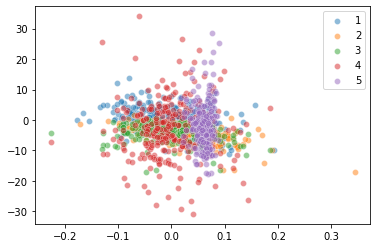

In [43]:
for i in range(5):
    sns.scatterplot(x=dmd1.modes.real[:,i], y=mydmd1.phi_.real[:,i], alpha=.5)
    plt.legend([1,2,3,4,5])
plt.show()

<AxesSubplot:>

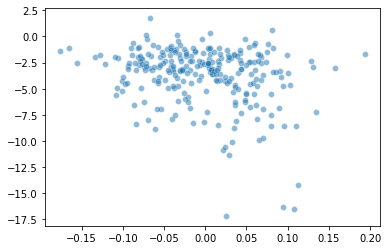

In [41]:
sns.scatterplot(x=dmd1.modes.real[:,0], y=mydmd1.phi_.real[:,1], alpha=.5)

<AxesSubplot:>

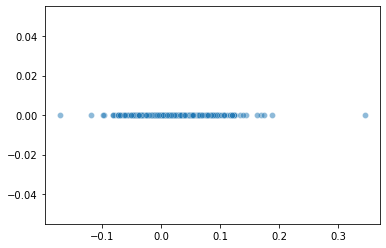

In [42]:
sns.scatterplot(x=dmd1.modes.real[:,1], y=dmd1.modes.imag[:,1], alpha=.5)

In [295]:
sns.scatterplot(x=mydmd1.phi_[:,4].real, y=mydmd1.phi_[:,4].imag, alpha=0.2)

IndexError: index 5 is out of bounds for axis 1 with size 5

In [293]:
mydmd1.phi_[:,4]


array([-1.33299413e+01, -5.34629272e+00,  7.57620341e+00, -3.28745280e+00,
        6.29622854e+00, -4.42467061e+00,  7.84780610e+00, -2.72866467e+00,
       -8.64255518e+00,  7.37382172e+00, -7.22033260e+00,  1.76047896e+00,
        2.28223819e+00, -3.15797407e+00, -1.08749772e+01, -2.28268264e-01,
       -1.04830120e+01, -4.03257149e-02, -1.86225987e+00, -6.26509584e+00,
       -1.06899597e-01, -3.60221270e+00, -8.65321575e-01, -1.89370196e+00,
       -3.35608860e+00, -9.23048628e-02,  2.21254998e+00,  2.33297596e+00,
       -2.72701012e+00,  6.95828127e-01,  2.88528133e+00, -7.70035578e-01,
       -4.35766901e+00,  2.99289504e+00, -9.73371801e-01, -1.60124789e+00,
        9.96411787e-01,  7.58852338e-01,  1.28048240e+00, -4.53688945e+00,
       -1.70497820e+00, -5.69593099e+00, -3.55946500e+00, -3.78048906e+00,
       -9.15240189e+00,  6.01717568e-01, -7.74777280e+00, -4.23560924e+00,
       -1.93671877e+00, -1.65666840e+00, -1.15763924e+01, -7.41055536e+00,
       -4.35120536e+00, -